<a href="https://colab.research.google.com/github/art-python/MSDeakin/blob/SIG720-MachineLearning/SIG720_TaskP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to import the file from google drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset file and read the csv
folder_path = "/content/drive/MyDrive/MSDeakin/SIG720-MachineLearning/"
file_name = "housing.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(folder_path + file_name)

Overview of dataset

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Description:

*   CRIM: Per capita crime rate by town
*   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
*   INDUS: Proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: Nitric oxide concentration (parts per 10 million)
*   RM: Average number of rooms per dwelling
*   AGE: Proportion of owner-occupied units built prior to 1940
*   DIS: Weighted distances to five Boston employment centers
*   RAD: Index of accessibility to radial highways
*   TAX: Full-value property tax rate per $10,000

*   PTRATIO: Pupil-teacher ratio by town
*  B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
*   LSTAT: Percentage of lower status of the population
*   MEDV: Median value of owner-occupied homes in $1000s



















In [8]:
dataset.shape

(506, 14)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
dataset.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [12]:
#copying the original file to another variable before starting any work.
df = dataset.copy()

In [13]:
# Checking for duplicate values
df.duplicated().sum()

0

In [14]:
# Checking for missing values
df.isnull().sum()

 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [20]:
df.columns

Index([' CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS',
       ' RAD', ' TAX', ' PTRATIO', ' B', ' LSTAT', ' MEDV'],
      dtype='object')

In [21]:
# Step 2: Split the dataset into features (X) and target (y)
X = df.drop(' MEDV', axis=1)  # Replace "target_column" with the actual target column name
y = df[' MEDV']  # Replace "target_column" with the actual target column name

In [22]:
# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Step 6: Report performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [26]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Explained Variance Score (EVS):", evs)

Mean Absolute Error (MAE): 3.189091965887837
Mean Squared Error (MSE): 24.291119474973478
R-squared (R2): 0.6687594935356326
Explained Variance Score (EVS): 0.6695178614705706


**Problem 2: Apply PCA and compare the performance with Q1**

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Step 2: Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [29]:
# Step 3: Split the dataset into train and test sets (same as in Q1)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [30]:
# Step 4: Train a linear regression model using the transformed features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression()

In [31]:
# Step 5: Make predictions on the test set using PCA-transformed features
y_pred_pca = model_pca.predict(X_test_pca)

In [32]:
# Step 6: Report performance metrics using PCA-transformed features
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
evs_pca = explained_variance_score(y_test, y_pred_pca)

In [33]:
print("Mean Absolute Error (MAE) with PCA:", mae_pca)
print("Mean Squared Error (MSE) with PCA:", mse_pca)
print("R-squared (R2) with PCA:", r2_pca)
print("Explained Variance Score (EVS) with PCA:", evs_pca)

Mean Absolute Error (MAE) with PCA: 4.99405190707241
Mean Squared Error (MSE) with PCA: 47.20285466952181
R-squared (R2) with PCA: 0.3563286573348259
Explained Variance Score (EVS) with PCA: 0.36839087085050093


**Problem 3: Load "IRIS" dataset, apply PCA, and train a logistic regression model**

In [34]:
from sklearn.datasets import load_iris

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
# Step 1: Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target

In [37]:
# Step 2: Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [38]:
# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [39]:
# Step 4: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Step 6: Report performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [42]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Problem 4: Apply L1 or L2 regularizer on the logistic regression model and compare performance**

In [43]:
# Step 3: Train a logistic regression model with L1 (Lasso) or L2 (Ridge) regularization
# Let's choose L1 regularization for this example
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
# Step 4: Make predictions on the test set using the L1 regularized model
y_pred_l1 = model_l1.predict(X_test)

In [45]:
# Step 5: Report performance metrics for the L1 regularized model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1, average='weighted')
recall_l1 = recall_score(y_test, y_pred_l1, average='weighted')
f1_l1 = f1_score(y_test, y_pred_l1, average='weighted')

In [46]:
print("Accuracy with L1 Regularization:", accuracy_l1)
print("Precision with L1 Regularization:", precision_l1)
print("Recall with L1 Regularization:", recall_l1)
print("F1 Score with L1 Regularization:", f1_l1)

Accuracy with L1 Regularization: 0.9666666666666667
Precision with L1 Regularization: 0.9694444444444444
Recall with L1 Regularization: 0.9666666666666667
F1 Score with L1 Regularization: 0.9664109121909632


**Problem 5: Load "digits" dataset, apply PCA, and visualize the data**

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap

In [48]:
# Step 1: Load the "digits" dataset
digits = load_digits()
X, y = digits.data, digits.target

In [49]:
# Step 2: Print the dimension of the original dataset
print("Dimension of the original dataset:", X.shape)

Dimension of the original dataset: (1797, 64)


In [56]:
# Step 3: Apply t-SNE and select the first three components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

In [60]:
# Step 4: Plot the selected components using a 3D scatter plot
cmap = get_cmap('tab10')
colors = cmap(y / np.max(y))  # Normalize target values to fit the colormap

<ipython-input-60-acf7c24178f2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


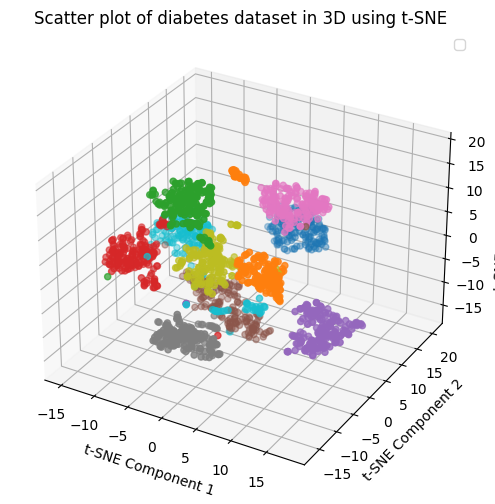

In [64]:
# Step 5: Visualize the data in 3D using a scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=colors)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('Scatter plot of diabetes dataset in 3D using t-SNE')
ax.legend()

plt.show()

**Problem 6: Classify the digit classes using SVM with RBF kernel**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# Step 2: Select appropriate data splitting approach (e.g., train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [67]:
# Step 3: Train an SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Step 4: Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [68]:
# Step 6: Report performance metrics and model hyperparameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7638888888888888
Precision: 0.7821197327379016
Recall: 0.7638888888888888
F1 Score: 0.757163503793496


In [69]:
# Step 7: Print the used model hyperparameters
print("SVM Model Hyperparameters:")
print("Kernel:", svm_model.kernel)
print("C (Regularization Parameter):", svm_model.C)
print("Gamma (Kernel Coefficient):", svm_model.gamma)

SVM Model Hyperparameters:
Kernel: rbf
C (Regularization Parameter): 1.0
Gamma (Kernel Coefficient): scale


**Problem 7: Load "diabetes" dataset, apply t-SNE, and visualize the selected components**

In [70]:
from sklearn.datasets import load_diabetes
from sklearn.manifold import TSNE

In [71]:
# Step 1: Load the "diabetes" dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Step 2: Print the dimension of the original dataset
print("Dimension of the original dataset:", X.shape)

Dimension of the original dataset: (442, 10)


In [72]:
# Step 3: Apply t-SNE and select the first three components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

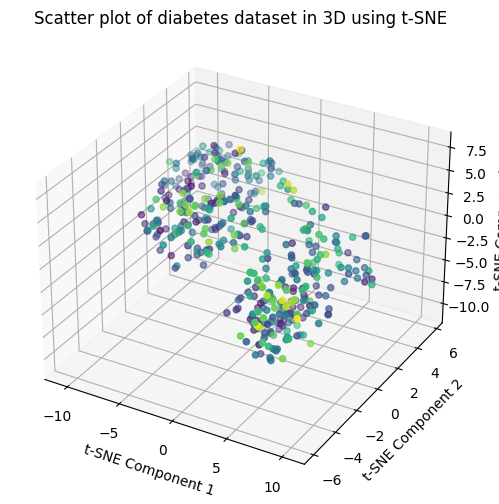

In [74]:
# Step 4: Plot the selected components using a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('Scatter plot of diabetes dataset in 3D using t-SNE')

plt.show()

**Problem 8: Create a model for detecting diabetes using SVM with a poly kernel**

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [76]:
# Step 1: Load the dataset and apply t-SNE (already done in Problem 7)

# Step 2: Select appropriate data splitting approach (e.g., train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [77]:
# Step 3: Train an SVM model with a polynomial kernel
svm_model_poly = SVC(kernel='poly')

# Step 4: Train the SVM model on the training data
svm_model_poly.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_poly = svm_model_poly.predict(X_test)

In [ ]:
# Step 6: Report performance metrics and model hyperparameters
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

In [81]:
print("Accuracy with Polynomial Kernel:", accuracy_poly)
print("Precision with Polynomial Kernel:", precision_poly)
print("Recall with Polynomial Kernel:", recall_poly)
print("F1 Score with Polynomial Kernel:", f1_poly)

Accuracy with Polynomial Kernel: 0.0
Precision with Polynomial Kernel: 0.0
Recall with Polynomial Kernel: 0.0
F1 Score with Polynomial Kernel: 0.0


In [79]:
# Step 7: Print the used model hyperparameters
print("SVM Model Hyperparameters with Polynomial Kernel:")
print("Kernel:", svm_model_poly.kernel)
print("C (Regularization Parameter):", svm_model_poly.C)
print("Degree (Polynomial Degree):", svm_model_poly.degree)

SVM Model Hyperparameters with Polynomial Kernel:
Kernel: poly
C (Regularization Parameter): 1.0
Degree (Polynomial Degree): 3
